In [2]:
import pandas as pd

df = pd.read_excel("Python Data.xlsx")

# 1] how many unique students are there in the dataset?

unique_students = df['Email ID'].nunique()

print("Number of unique students:",unique_students)


Number of unique students: 2157


In [3]:
# 2] what is the average GPA of students
average_cgpa = df['CGPA'].mean().round(4)

print("Average GPA students:",average_cgpa)

Average GPA students: 8.0385


In [4]:
# 3] what is the distribution of the students across different graduation years?
grad_year_distribution = df['Year of Graduation'].value_counts().sort_index()

# Print the distribution
print("Distribution of students by graduation year:")
print(grad_year_distribution)

Distribution of students by graduation year:
Year of Graduation
2023    1536
2024    1511
2025    1292
2026     555
Name: count, dtype: int64


In [5]:
# 4] what is the distribution of student's experiance with python programming?
python_exp_distribution = df['Experience with python (Months)'].value_counts().sort_index()

print("Distribution of students' experience with Python (in months):")
print(python_exp_distribution)

Distribution of students' experience with Python (in months):
Experience with python (Months)
3    1008
4     466
5    1242
6     738
7     640
8     800
Name: count, dtype: int64


In [6]:
# 5] what is the average family income of the student?

income_distribution = df['Family Income'].value_counts().sort_index()

print("Distribution of students by family income range:")
print(income_distribution)



Distribution of students by family income range:
Family Income
0-2 Lakh    4525
2-5 Lakh     200
5-7 Lakh      80
7 Lakh+       89
Name: count, dtype: int64


In [7]:
# 6] How does GPA vary amongst different colleges? (show top 5 results only)

college_gpa = df.groupby('College Name')['CGPA'].mean().round(2)

# Sort in descending order and show top 5
top_5_colleges = college_gpa.sort_values(ascending=False).head(5)

print("Top 5 colleges by average CGPA:")
print(top_5_colleges)

Top 5 colleges by average CGPA:
College Name
THAKUR INSTITUTE OF MANAGEMENT STUDIES, CAREER DEVELOPMENT & RESEARCH - [TIMSCDR]    8.59
St Xavier's College                                                                  8.58
B. K. Birla College of Arts, Science & Commerce (Autonomous), Kalyan                 8.46
Symbiosis Institute of Technology, Pune                                              8.30
MIT Academy Of Engineering ,Alandi                                                   8.28
Name: CGPA, dtype: float64


In [8]:
# 7] are there any outliers in 'attending status' & 'quantity (number of course completed)' attribuite?

print("Unique values in 'attendance status':")
print(df['Attendee Status'].value_counts())


Unique values in 'attendance status':
Attendee Status
Attending    4882
NAN            12
Name: count, dtype: int64


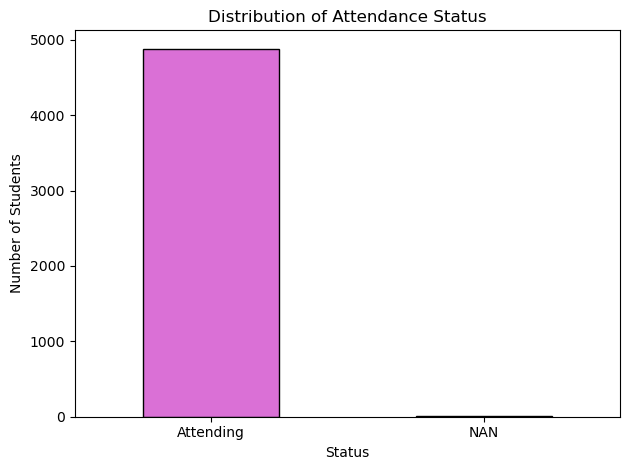

In [9]:
import matplotlib.pyplot as plt

df['Attendee Status'].value_counts().plot(kind='bar', color='orchid', edgecolor='black')
plt.title("Distribution of Attendance Status")
plt.xlabel("Status")
plt.ylabel("Number of Students")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [10]:
# 8] what is the average gpa of student from each city?

avg_cgpa_per_city = df.groupby('City')['CGPA'].mean().sort_values(ascending=False).round(3)

print("Average CGPA of students from each city:")
print(avg_cgpa_per_city)

Average CGPA of students from each city:
City
Kolhapur     8.557
Raipur       8.507
Sonipat      8.464
Gurugram     8.459
Puri         8.450
             ...  
Panipat      7.615
Nashik       7.593
Daman        7.421
Rewari       7.392
New Delhi    7.307
Name: CGPA, Length: 177, dtype: float64


In [11]:
# 9] can we identify and relationship between family income and GPA?

# Group by income range and calculate average CGPA
avg_gpa_by_income = df.groupby('Family Income')['CGPA'].mean().sort_index()

print("Average CGPA by Family Income Range:")
print(avg_gpa_by_income)



Average CGPA by Family Income Range:
Family Income
0-2 Lakh    8.033525
2-5 Lakh    8.115000
5-7 Lakh    8.003750
7 Lakh+     8.149438
Name: CGPA, dtype: float64


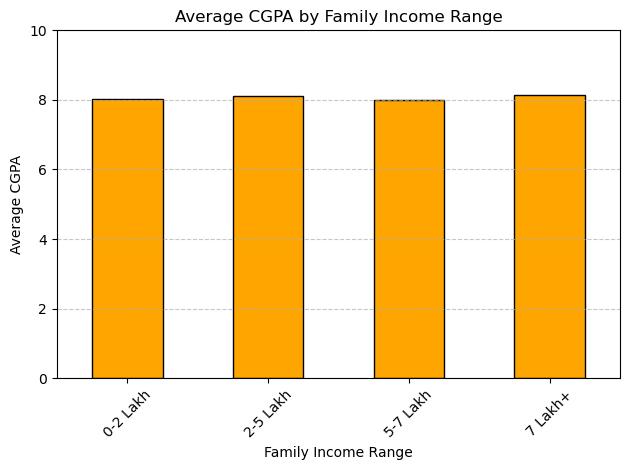

In [13]:
  import matplotlib.pyplot as plt

  avg_gpa_by_income.plot(kind='bar', color='orange', edgecolor='black')
  plt.title("Average CGPA by Family Income Range")
  plt.xlabel("Family Income Range")
  plt.ylabel("Average CGPA")
  plt.xticks(rotation=45)
  plt.ylim(0, 10)
  plt.tight_layout()
  plt.grid(axis='y', linestyle='--', alpha=0.7)
  plt.show()

No significant relationship can be identified between family income and CGPA from this graph.
The academic performance (CGPA) appears to be fairly consistent across income groups.

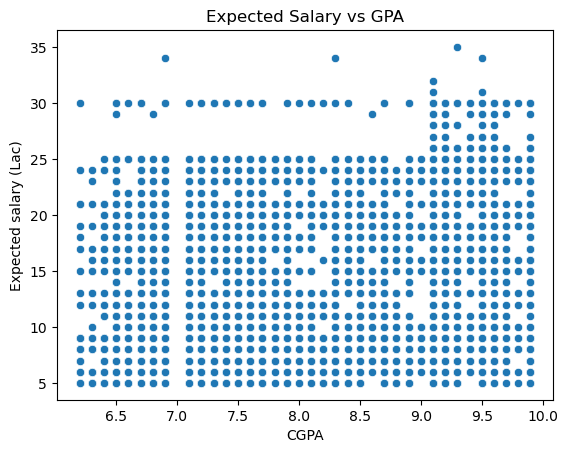

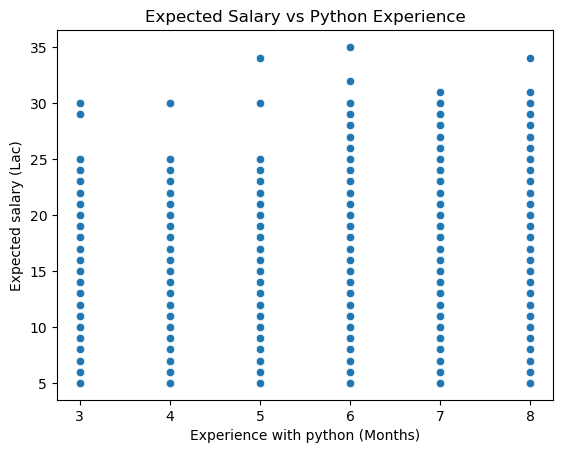

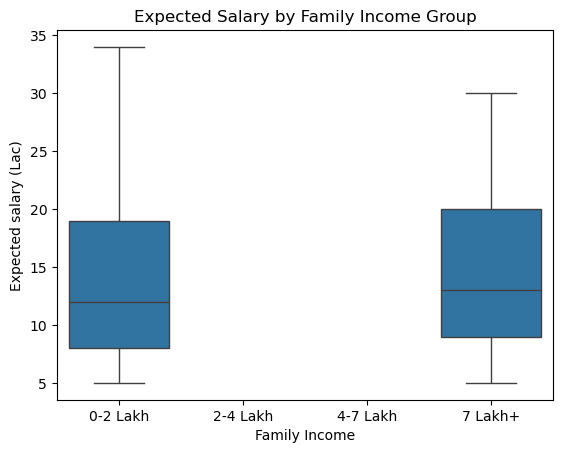

In [14]:
# 10]how does expected salary vary based on factore like 'GPA','Family income','Experiance with python (Months)'?
# Clean Expected Salary column (if needed)
import seaborn as sns
df['Expected salary (Lac)'] = pd.to_numeric(df['Expected salary (Lac)'], errors='coerce')

# Convert family income to ordered categories
income_order = ['0-2 Lakh', '2-4 Lakh', '4-7 Lakh', '7 Lakh+']
df['Family Income'] = pd.Categorical(df['Family Income'], categories=income_order, ordered=True)

# Plot 1: GPA vs Expected Salary
sns.scatterplot(x='CGPA', y='Expected salary (Lac)', data=df)
plt.title("Expected Salary vs GPA")
plt.show()

# Plot 2: Python Experience vs Expected Salary
sns.scatterplot(x='Experience with python (Months)', y='Expected salary (Lac)', data=df)
plt.title("Expected Salary vs Python Experience")
plt.show()

# Plot 3: Family Income vs Expected Salary
sns.boxplot(x='Family Income', y='Expected salary (Lac)', data=df)
plt.title("Expected Salary by Family Income Group")
plt.show()


In [25]:
# 11] Which event tend to attract more students from specific fields of study?

# Group by 'Events' and 'Designation' to get student count
event_field_counts = df.groupby(['Events', 'Designation']).size().reset_index(name='student_count')

# For each event, get the designation with the highest student count
top_field_per_event = event_field_counts.sort_values('student_count', ascending=False).drop_duplicates('Events')

# ✅ Sort by student count in descending order
top_field_per_event = top_field_per_event.sort_values('student_count', ascending=False)

# Display result
print("🎯 Most attracted field of study for each event:")
print(top_field_per_event)



🎯 Most attracted field of study for each event:
                                         Events Designation  student_count
76                  product design & full stack    students            842
55      internship program(ip) success conclave    students            545
0                        art of resume building    students            478
2             data visualization using power bi    students            455
80  talk on skill and employability enhancement    students            379
79          skill and employability enhancement    students            318
60                     is data science for you?    students            303
3                               hello ml and dl    students            262
75                         kyc - know your ccpc    students            166
82             the sdlc & their transformations    students            142
1                       artificial intelligence    students            125
81                    the agile ways of working    s

/var/folders/ky/8p6qhw7556b9qbfpr4ygzj4m0000gn/T/ipykernel_11612/3442266408.py:10: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


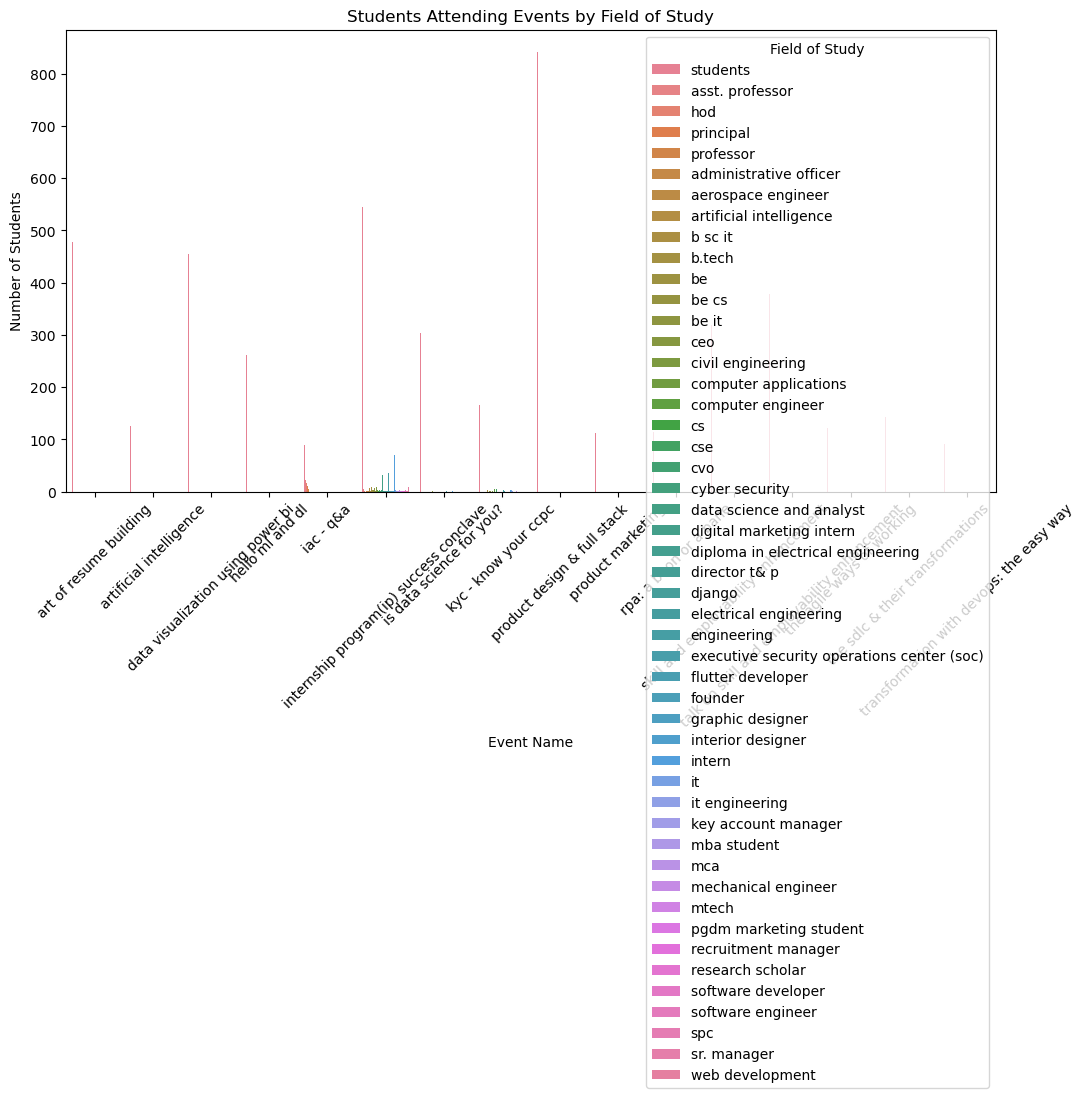

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.barplot(data=event_field_counts, x='Events', y='student_count', hue='Designation')
plt.title("Students Attending Events by Field of Study")
plt.xlabel("Event Name")
plt.ylabel("Number of Students")
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title='Field of Study')
plt.show()


In [27]:
# Additional data

print(" Top event-designation combinations with highest student count:")

top_event_field_combinations = event_field_counts.sort_values('student_count', ascending=False)
print(top_event_field_combinations.head)


 Top event-designation combinations with highest student count:
<bound method NDFrame.head of                                          Events          Designation  \
76                  product design & full stack             students   
55      internship program(ip) success conclave             students   
0                        art of resume building             students   
2             data visualization using power bi             students   
80  talk on skill and employability enhancement             students   
..                                          ...                  ...   
51      internship program(ip) success conclave   software developer   
53      internship program(ip) success conclave                  spc   
54      internship program(ip) success conclave          sr. manager   
13      internship program(ip) success conclave              b sc it   
42      internship program(ip) success conclave  key account manager   

    student_count  
76            842  
5

In [17]:
# 12] Do students in leadership positions during their college years tend to have higher GPAs or better expected salary?

# Step 1: Strip leading/trailing spaces and lowercase the values
df['Leadership- skills'] = df['Leadership- skills'].str.strip().str.lower()

# Optional: Capitalize first letter for cleaner output (e.g., 'Yes', 'No')
df['Leadership- skills'] = df['Leadership- skills'].replace({'yes': 'Yes', 'no': 'No'})

# Step 2: Group by Leadership status and calculate average GPA and Expected Salary
leadership_stats = df.groupby('Leadership- skills')[['CGPA', 'Expected salary (Lac)']].mean().reset_index()

print("📈 Average GPA and Expected Salary based on Leadership Experience:")
print(leadership_stats)


📈 Average GPA and Expected Salary based on Leadership Experience:
  Leadership- skills      CGPA  Expected salary (Lac)
0                 No  8.039320              13.917561
1                Yes  8.036787              13.971796


Conclusion: There is no significant difference in GPA, but students with leadership roles tend to expect slightly higher salaries, which could reflect increased confidence or ambition.

In [18]:
# 13] Is there a correlation between leadership skills and expected salary of the students?

from scipy.stats import ttest_ind

# Clean the 'Leadership- skills' column again (if not already cleaned)
df['Leadership- skills'] = df['Leadership- skills'].str.strip().str.lower().replace({'yes': 'Yes', 'no': 'No'})

# Separate the salaries into two groups
salary_leaders = df[df['Leadership- skills'] == 'Yes']['Expected salary (Lac)']
salary_non_leaders = df[df['Leadership- skills'] == 'No']['Expected salary (Lac)']

# Perform t-test
t_stat, p_value = ttest_ind(salary_leaders, salary_non_leaders, equal_var=False)

print("T-statistic:", t_stat)
print("P-value:", p_value)

# Interpretation
if p_value < 0.05:
    print("There is a statistically significant difference in expected salary based on leadership skills.")
else:
    print("There is no statistically significant difference in expected salary based on leadership skills.")


T-statistic: 0.27903812606995104
P-value: 0.78023295325378
There is no statistically significant difference in expected salary based on leadership skills.


In [19]:
# 14]  How many students are graduating by the end of 2024?

df['Year of Graduation'] = pd.to_numeric(df['Year of Graduation'], errors='coerce')

# Filter and count students graduating by end of 2024
graduates_2024_or_earlier = df[df['Year of Graduation'] <= 2024]

# Result
print("Number of students graduating by the end of 2024:", len(graduates_2024_or_earlier))

Number of students graduating by the end of 2024: 3047


In [20]:
# 15] Which promotion channel brings in more student participations for the event?(wihtout others column)

top_channels = df['How did you come to know about this event?'].value_counts()

print("📢 Student participation by promotion channel:")
print(top_channels)

📢 Student participation by promotion channel:
How did you come to know about this event?
Whatsapp                                                                                       1067
Email                                                                                           438
SPOC/ College Professor                                                                         326
Others                                                                                          153
Cloud Counselage Website                                                                        129
                                                                                               ... 
Youtube | Instagram | Whatsapp | Email                                                            1
LinkedIn | Email | Telegram                                                                       1
Youtube | Email | Others                                                                          1
Youtube | F

In [21]:
# 15] Which promotion channel brings in more student participations for the event?

# Fill in actual sources where "Others" was selected
df['Promotion Channel'] = df.apply(
    lambda row: row["Specify in \"Others\" (how did you come to know about this event)"]
    if row["How did you come to know about this event?"] == "Others" and pd.notna(row["Specify in \"Others\" (how did you come to know about this event)"])
    else row["How did you come to know about this event?"],
    axis=1
)

# Drop rows with missing values in promotion channel
df['Promotion Channel'] = df['Promotion Channel'].dropna()

# Count and display
channel_counts = df['Promotion Channel'].value_counts()

print("📢 Student participation by promotion channel:")
print(channel_counts)


📢 Student participation by promotion channel:
Promotion Channel
Whatsapp                                                                                       1067
Email                                                                                           438
SPOC/ College Professor                                                                         326
Cloud Counselage Website                                                                        129
Others                                                                                           80
                                                                                               ... 
LinkedIn | Email | Telegram                                                                       1
Youtube | Email | Others                                                                          1
Youtube | Facebook | Instagram | LinkedIn | Whatsapp | Email | Telegram | Friend/ Classmate       1
Youtube | Facebook | Instagram | Lin

In [22]:
# 16] Find the total number of students who attended the events related to Data Science? (From all Data Science related courses.)
# Normalize again just in case
df['Events'] = df['Events'].astype(str).str.strip().str.lower()
df['Designation'] = df['Designation'].astype(str).str.strip().str.lower()

# Exact matching using lowercase values from your data
filtered_df = df[
    (df['Events'] == "is data science for you?") &
    (df['Designation'] == "data science and analyst")
]

# Output the count
print("📊 Total students with designation 'Data Science and Analyst' who attended 'IS DATA SCIENCE FOR YOU?':", len(filtered_df))




📊 Total students with designation 'Data Science and Analyst' who attended 'IS DATA SCIENCE FOR YOU?': 0


In [23]:
# 17] Those who have high CGPA & More experience in language & those who had high expectations for salary? (Avg)

# Convert relevant columns to numeric
df['CGPA'] = pd.to_numeric(df['CGPA'], errors='coerce')
df['Experience with python (Months)'] = pd.to_numeric(df['Experience with python (Months)'], errors='coerce')
df['Expected salary (Lac)'] = pd.to_numeric(df['Expected salary (Lac)'], errors='coerce')

# Compute overall averages
avg_cgpa = df['CGPA'].mean()
avg_exp = df['Experience with python (Months)'].mean()
avg_salary = df['Expected salary (Lac)'].mean()

# Filter students above average in all three
high_performers = df[
    (df['CGPA'] > avg_cgpa) &
    (df['Experience with python (Months)'] > avg_exp) &
    (df['Expected salary (Lac)'] > avg_salary)
]

# Calculate averages among high performers
hp_avg_cgpa = high_performers['CGPA'].mean()
hp_avg_exp = high_performers['Experience with python (Months)'].mean()
hp_avg_salary = high_performers['Expected salary (Lac)'].mean()

# Print results
print("📊 Averages for Students with High CGPA, Experience, and Expected Salary:")
print(f"Average CGPA: {hp_avg_cgpa:.2f}")
print(f"Average Python Experience (Months): {hp_avg_exp:.1f}")
print(f"Average Expected Salary (Lac): {hp_avg_salary:.2f}")




📊 Averages for Students with High CGPA, Experience, and Expected Salary:
Average CGPA: 9.17
Average Python Experience (Months): 7.0
Average Expected Salary (Lac): 20.64


In [24]:
# 18] How many students know about the event from their colleges? Which of these Top 5 colleges?

# Normalize both columns for case-insensitive search
df['How did you come to know about this event?'] = df['How did you come to know about this event?'].astype(str).str.lower()
df['Specify in "Others" (how did you come to know about this event)'] = df['Specify in "Others" (how did you come to know about this event)'].astype(str).str.lower()

# Condition: if 'college' is mentioned in either column
college_known = df[
    df['How did you come to know about this event?'].str.contains("college") |
    df['Specify in "Others" (how did you come to know about this event)'].str.contains("college")
]

# Count of total students who got to know via college
total = len(college_known)
print(f"Total students who got to know about the event from their college: {total}")

# Group by College name and show top 5
top_5_colleges = college_known['College Name'].value_counts().head(5)
print("Top 5 colleges where students heard about the event from their college:")
print(top_5_colleges)


Total students who got to know about the event from their college: 504
Top 5 colleges where students heard about the event from their college:
College Name
vidyalankar institute of technology, mumbai              28
kle society's college of bca, rls institute, belagavi    25
mit academy of engineering ,alandi                       24
ld college of engineering, ahmedabad, gujarat            23
wilson college                                           22
Name: count, dtype: int64
